# Supervised Learning

## Multiclass: Logistic Regresssion: Example: Iris

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)
print(np.bincount(y))

(150, 4)
[50 50 50]


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg = LogisticRegression(multi_class="multinomial", solver="lbfgs").fit(X, y)
linearsvm = LinearSVC().fit(X, y)

C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\KUNAL\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [4]:
print(logreg.coef_.shape)
# 3 classes
# 4 input features

(3, 4)


In [5]:
print(linearsvm.coef_.shape)
# 3 classes = 3 * (3-1) * 0.5
# 4 input features

(3, 4)


In [6]:
logreg.coef_

array([[-0.41943756,  0.96749376, -2.5205723 , -1.084326  ],
       [ 0.53147635, -0.3150198 , -0.20094963, -0.94785159],
       [-0.11203879, -0.65247397,  2.72152193,  2.03217759]])

In [7]:
logreg.intercept_

array([  9.84186228,   2.21913963, -12.06100191])

In [8]:
from sklearn.preprocessing import scale
logreg = LogisticRegression(fit_intercept=False, multi_class="multinomial", solver="lbfgs").fit(scale(X), y)

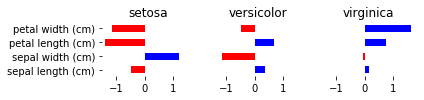

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(6, 1.5))
for ax, coef, classname in zip(axes, logreg.coef_, iris.target_names):
    ax.barh(range(4), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    ax.set_xlim(logreg.coef_.min() - .1, logreg.coef_.max() + .1)

    ax.set_title(classname)
    ax.set_frame_on(False)
    ax.set_yticks(())
    
axes[0].set_yticks(range(4))
axes[0].set_yticklabels(iris.feature_names)
plt.tight_layout()